In [77]:
from swot_datahandler import *
from swot_datafunctions import *

# Load functions
import matplotlib.pyplot as plt
import numpy as np
import cartopy
import cartopy.crs as ccrs


In [182]:
# Settings
#cycles = np.arange(495, 505+1).tolist()
cycles = np.arange(474, 578+1).tolist()
print(cycles)
#cycles = np.arange(500, 577+1).tolist()

[474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578]


In [183]:
# Load Karin 2km data
#cycles = np.arange(474, 578+1).tolist()
passes_1_eastSea = [6,21]
#path = "D:/MasterThesis/PreBetaKaRIn_1day/expert/*"
path = "D:/MasterThesis/PreBetaKaRIn_1day/expert/*"
karin2 = loadKarinL2B(path, cycles=cycles, passes=passes_1_eastSea, dist2coast=50)

Computing custom SSH variables


In [184]:
# Load Nadir 1Hz data
#cycles = np.arange(550, 578+1).tolist() # gauges
path = "D:\MasterThesis\SIGDR\*"
nadir1 = loadNadir1Hz(path, cycles=cycles, passes=[6,21])

In [81]:
# Load Nadir data
path = "D:\MasterThesis\SIGDR\*"
nadir20 = loadNadir20Hz(path, cycles=cycles, passes=[6,21])

In [185]:
AOI = [125, 135, 35, 43]
karin2 = karin_l2b_filtering(karin2,AOI,20,2,detrend=True,type="design")

Cycle 500


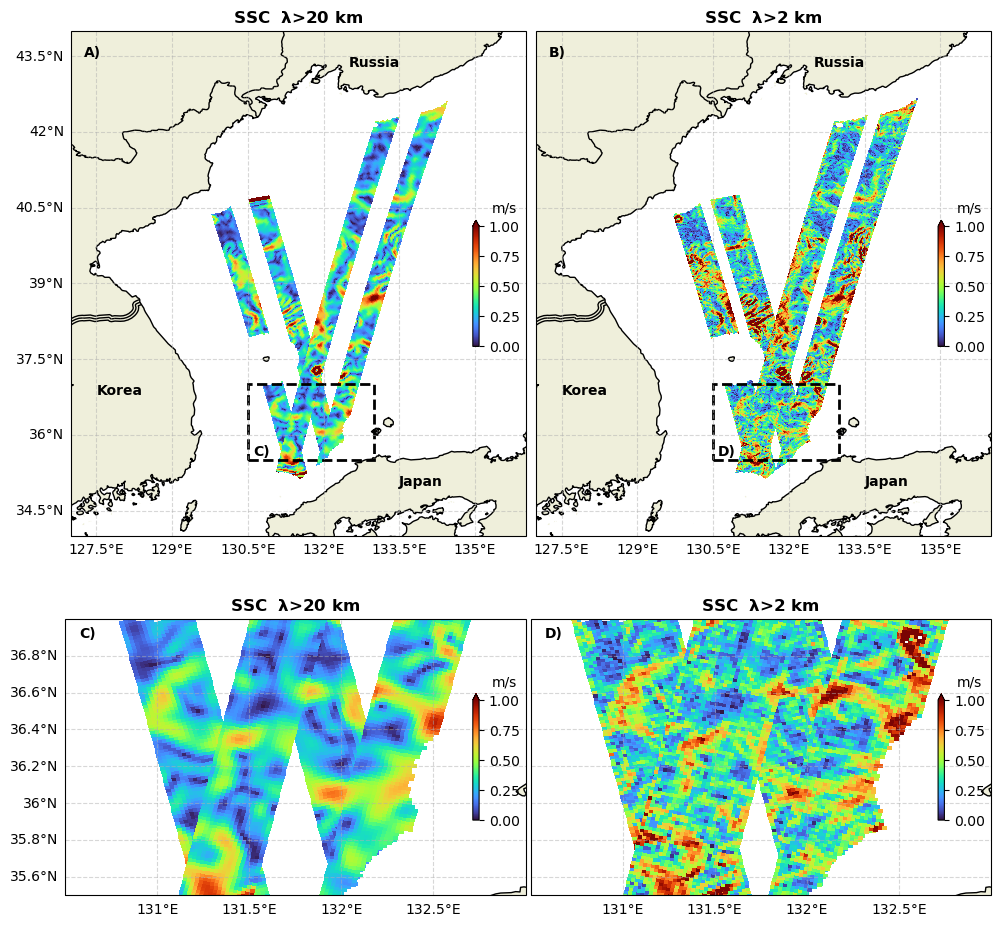

In [160]:
AOI = [128, 135, 35, 43]
AOI2 = [130.5, 133, 35.5, 37]
#remove_margin = 15

#c = list(karin2.keys())[1]
c = 500
print("Cycle",c)

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(2,2,1, projection=ccrs.PlateCarree())
detrend = False
gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False,alpha=0.5,linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.bottom_labels = True
ax.coastlines(resolution='10m')
ax.add_feature(cartopy.feature.LAND, zorder=1)
ax.add_feature(cartopy.feature.BORDERS)

# KaRIn
for p in karin2[c].keys():
    key = "ssh_geoid_long"
    ssh = np.copy(karin2[c][p][key]["ssc_mag"])
    lat = karin2[c][p][key]["lat"]
    lon = karin2[c][p][key]["lon"]
    sc=ax.pcolormesh(lon, lat, ssh, cmap="turbo", vmin=0, vmax=1)
cb=fig.colorbar(sc, orientation="vertical", shrink=0.25, pad=-0.11, extend="max")
cb.ax.set_title('m/s',x=5, fontsize=10)
cb.ax.tick_params(labelsize=10)

ax.text(AOI[0]-0.75, AOI[3]+0.5, "A)", fontweight="bold")
from matplotlib.patches import Rectangle
ax.add_patch(Rectangle((AOI2[0], AOI2[2]), AOI2[1]-AOI2[0], AOI2[3]-AOI2[2], linewidth=2, edgecolor='k', linestyle="--", facecolor='None'))
ax.text(AOI2[0]+0.1, AOI2[2]+0.1, "C)", fontweight="bold")

ax.text(133.5, 35, "Japan", fontweight="bold")
#ax.annotate("Japan", (133.5, 35), (133.5, 35), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
ax.text(127.5, 36.8, "Korea", fontweight="bold")
#ax.annotate("Korea", (127.5, 36.8), (127.5, 36.8), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
ax.text(132.5, 43.3, "Russia", fontweight="bold")
#ax.annotate("Russia", (132.5, 43.3), (132.5, 43.3), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
#ax.set_title("Data Extent", fontweight="bold")
ax.set_extent(np.array(AOI)+np.array([-1,1,-1,1])*1, crs=ccrs.PlateCarree())
ax.set_title("SSC  $\mathbf{\lambda}}$>20 km", fontweight="bold")


ax = fig.add_subplot(2,2,2, projection=ccrs.PlateCarree())
detrend = False
ax.coastlines(resolution='10m')
ax.add_feature(cartopy.feature.LAND, zorder=1)
gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False,alpha=0.5,linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.left_labels = False
gl.bottom_labels = True
ax.add_feature(cartopy.feature.BORDERS)



# KaRIn
for p in karin2[c].keys():
    key = "ssh_geoid_full"
    ssh = np.copy(karin2[c][p][key]["ssc_mag"])
    lat = karin2[c][p][key]["lat"]
    lon = karin2[c][p][key]["lon"]
    sc=ax.pcolormesh(lon, lat, ssh, cmap="turbo", vmin=0, vmax=1)
cb=fig.colorbar(sc, orientation="vertical", shrink=0.25, pad=-0.11, extend="max")
cb.ax.set_title('m/s',x=5, fontsize=10)
cb.ax.tick_params(labelsize=10)

ax.text(AOI[0]-0.75, AOI[3]+0.5, "B)", fontweight="bold")
from matplotlib.patches import Rectangle
ax.add_patch(Rectangle((AOI2[0], AOI2[2]), AOI2[1]-AOI2[0], AOI2[3]-AOI2[2], linewidth=2, edgecolor='k', linestyle="--", facecolor='None'))
ax.text(AOI2[0]+0.1, AOI2[2]+0.1, "D)", fontweight="bold")

ax.text(133.5, 35, "Japan", fontweight="bold")
#ax.annotate("Japan", (133.5, 35), (133.5, 35), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
ax.text(127.5, 36.8, "Korea", fontweight="bold")
#ax.annotate("Korea", (127.5, 36.8), (127.5, 36.8), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
ax.text(132.5, 43.3, "Russia", fontweight="bold")
#ax.annotate("Russia", (132.5, 43.3), (132.5, 43.3), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
#ax.set_title("Data Extent", fontweight="bold")
ax.set_extent(np.array(AOI)+np.array([-1,1,-1,1])*1, crs=ccrs.PlateCarree())
ax.set_title("SSC  $\mathbf{\lambda}}$>2 km", fontweight="bold")


ax = fig.add_subplot(2,2,3, projection=ccrs.PlateCarree())
detrend = False
ax.coastlines(resolution='10m')
ax.add_feature(cartopy.feature.LAND, zorder=1)
gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False,alpha=0.5,linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.left_labels = True
gl.bottom_labels = True
ax.add_feature(cartopy.feature.BORDERS)



# KaRIn
for p in karin2[c].keys():
    key = "ssh_geoid_long"
    ssh = np.copy(karin2[c][p][key]["ssc_mag"])
    lat = karin2[c][p][key]["lat"]
    lon = karin2[c][p][key]["lon"]
    sc=ax.pcolormesh(lon, lat, ssh, cmap="turbo", vmin=0, vmax=1)
cb=fig.colorbar(sc, orientation="vertical", shrink=0.25, pad=-0.11, extend="max")
cb.ax.set_title('m/s',x=5, fontsize=10)
cb.ax.tick_params(labelsize=10)

ax.text(AOI2[0]+0.075, AOI2[3]-0.1, "C)", fontweight="bold")

ax.set_extent(AOI2, crs=ccrs.PlateCarree())
ax.set_title("SSC  $\mathbf{\lambda}}$>20 km", fontweight="bold")



ax = fig.add_subplot(2,2,4, projection=ccrs.PlateCarree())
detrend = False
ax.coastlines(resolution='10m')
ax.add_feature(cartopy.feature.LAND, zorder=1)
gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False,alpha=0.5,linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.left_labels = False
gl.bottom_labels = True
ax.add_feature(cartopy.feature.BORDERS)



# KaRIn
for p in karin2[c].keys():
    key = "ssh_geoid_full"
    ssh = np.copy(karin2[c][p][key]["ssc_mag"])
    ssh[ssh>np.nanstd(ssh)*5] = np.nan
    lat = karin2[c][p][key]["lat"]
    lon = karin2[c][p][key]["lon"]
    sc=ax.pcolormesh(lon, lat, ssh, cmap="turbo", vmin=0, vmax=1)
cb=fig.colorbar(sc, orientation="vertical", shrink=0.25, pad=-0.11, extend="max")
cb.ax.set_title('m/s',x=5, fontsize=10)
cb.ax.tick_params(labelsize=10)

ax.text(AOI2[0]+0.075, AOI2[3]-0.1, "D)", fontweight="bold")

ax.set_extent(AOI2, crs=ccrs.PlateCarree())
ax.set_title("SSC  $\mathbf{\lambda}}$>2 km", fontweight="bold")


plt.tight_layout(pad=0)
plt.show()


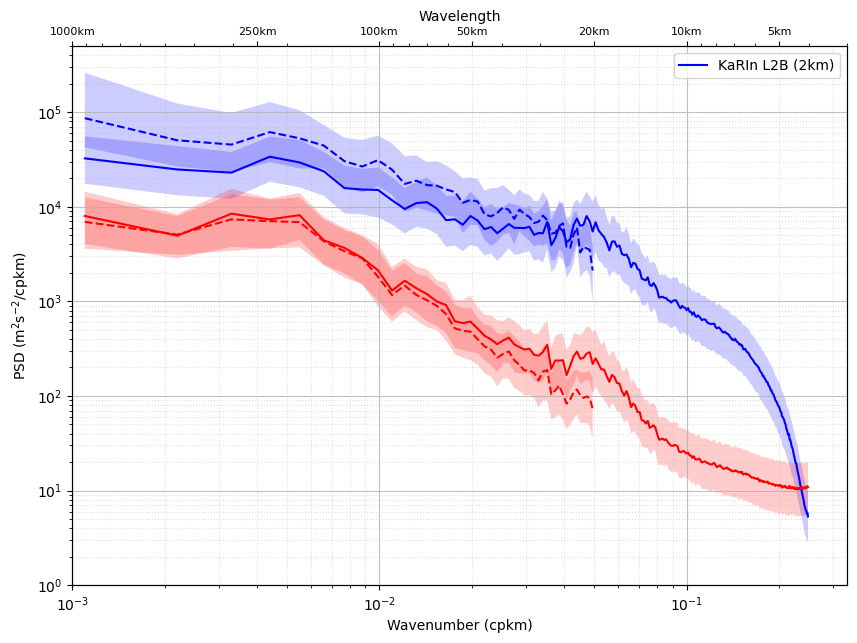

In [186]:
fig, ax = plt.subplots(figsize=(10,7))

# KaRIn L2B
key = "ssh_geoid_full"
c = list(karin2.keys())[0]
p = list(karin2[c].keys())[0]
ssh = []
for c in karin2.keys():
    for p in karin2[c].keys():
        for i in range(karin2[c][p][key]["lat"].shape[1]):
            vel = karin2[c][p][key]["ssc_u"][:,i]# + 1j*karin2[c][p][key]["ssc_v"][:,i]
            ssh.append(vel)
ssh.sort(key=len, reverse=True)
psd_karin2, k_karin2, sd = periodogram_list(ssh, conf_lvl=68, tapering_f="tukey", sampling=2000, unit="cm")
ax.loglog(k_karin2, psd_karin2, 'b')
ax.fill_between(k_karin2, sd[0,:], sd[1,:], color='b',edgecolor=None, alpha=.2,label="_nolegend_")


# KaRIn L2B
key = "ssh_geoid_long"
c = list(karin2.keys())[0]
p = list(karin2[c].keys())[0]
ssh = []
for c in karin2.keys():
    for p in karin2[c].keys():
        for i in range(karin2[c][p][key]["lat"].shape[1]):
            vel = karin2[c][p][key]["ssc_u"][:,i]# + 1j*karin2[c][p][key]["ssc_v"][:,i]
            #vel = karin2[c][p][key]["ssc_mag"][:,i]
            ssh.append(vel)
ssh.sort(key=len, reverse=True)
psd_karin2, k_karin2, sd = periodogram_list(ssh, conf_lvl=68, tapering_f="tukey", sampling=2000, unit="cm")
psd_karin2 = psd_karin2[k_karin2<20**(-1)]
sd = sd[:,k_karin2<20**(-1)]
k_karin2 = k_karin2[k_karin2<20**(-1)]
ax.loglog(k_karin2, psd_karin2, 'b', linestyle="--")
ax.fill_between(k_karin2, sd[0,:], sd[1,:], color='b',edgecolor=None, alpha=.2,label="_nolegend_")


# KaRIn L2B
key = "ssh_geoid_full"
c = list(karin2.keys())[0]
p = list(karin2[c].keys())[0]
ssh = []
for c in karin2.keys():
    for p in karin2[c].keys():
        for i in range(karin2[c][p][key]["lat"].shape[1]):
            #vel = karin2[c][p][key]["ssc_u"][:,i] + 1j*karin2[c][p][key]["ssc_v"][:,i]
            vel = karin2[c][p][key]["ssh"][:,i]
            kern = np.hanning(2/2)
            kern /= kern.sum()
            vel = np.convolve(vel, kern, mode="same")
            ssh.append(vel)
ssh.sort(key=len, reverse=True)
psd_karin2, k_karin2, sd = periodogram_list(ssh, conf_lvl=68, tapering_f="tukey", sampling=2000, unit="m")
g = 9.82
Omega = 7.292*10**(-5) # From Steward 2008 p. 108 # s^-1
f = 2*Omega * np.sin(np.deg2rad(39))

psd_karin2_u = (g/f)**2*(2*np.pi*k_karin2)*psd_karin2
psd_karin2_u /= 1e4
sd_u  = (g/f)**2*(2*np.pi*k_karin2)*sd
sd_u /= 1e4

ax.loglog(k_karin2, psd_karin2_u, 'r')
ax.fill_between(k_karin2, sd_u[0,:], sd_u[1,:], color='r',edgecolor=None, alpha=.2,label="_nolegend_")


# KaRIn L2B
key = "ssh_geoid_full"
c = list(karin2.keys())[0]
p = list(karin2[c].keys())[0]
ssh = []
for c in karin2.keys():
    for p in karin2[c].keys():
        for i in range(karin2[c][p][key]["lat"].shape[1]):
            #vel = karin2[c][p][key]["ssc_u"][:,i] + 1j*karin2[c][p][key]["ssc_v"][:,i]
            vel = karin2[c][p][key]["ssh"][:,i]
            kern = np.hanning(20/2)
            kern /= kern.sum()
            vel = np.convolve(vel, kern, mode="same")
            ssh.append(vel)
ssh.sort(key=len, reverse=True)
psd_karin2, k_karin2, sd = periodogram_list(ssh, conf_lvl=68, tapering_f="tukey", sampling=2000, unit="m")
psd_karin2 = psd_karin2[k_karin2<20**(-1)]
sd = sd[:,k_karin2<20**(-1)]
k_karin2 = k_karin2[k_karin2<20**(-1)]

g = 9.82
Omega = 7.292*10**(-5) # From Steward 2008 p. 108 # s^-1
f = 2*Omega * np.sin(np.deg2rad(39))

psd_karin2_u = (g/f)**2*(2*np.pi*k_karin2)*psd_karin2
psd_karin2_u /= 1e4
sd_u  = (g/f)**2*(2*np.pi*k_karin2)*sd
sd_u /= 1e4

ax.loglog(k_karin2, psd_karin2_u, 'r', linestyle="--")
ax.fill_between(k_karin2, sd_u[0,:], sd_u[1,:], color='r',edgecolor=None, alpha=.2,label="_nolegend_")


ax.legend(["KaRIn L2B (2km)"])

# Setup plot settings
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Wavenumber (cpkm)")
ax.set_ylabel("PSD (m$^2$s$^{-2}$/cpkm)")
ax.set_yticks(np.logspace(-6,6,13))
ax.set_ylim([1e0, 5e5])
ax.grid(which="major", alpha=0.8)
ax.grid(which="minor", alpha=0.4, linestyle=":")

# Create second axis
km_lims = [1000, 3]
ax.set_xlim([km_lims[0]**(-1), km_lims[1]**(-1)])
ax2 = ax.twiny()
ax2.set_xlabel("Wavelength")
ax2.set_xscale("log")
ax2.set_xlim(km_lims)
ticks = [1000, 250, 100, 50, 20, 10, 5]
ax2.set_xticks(ticks)
ax2.set_xticklabels([str(t)+"km" for t in ticks], fontsize=8)

plt.show()

In [7]:
# Sentinel-6
# Note for S6a: What is intermission bias?
EXTERNAL_DATA_PATH = "D:\MasterThesis\S6Anrt\.*"

all_files = glob.glob(EXTERNAL_DATA_PATH)

# Only use the first n
#all_files = all_files[:100]


# Initialize dict
file = nc.Dataset(all_files[0], "r")
s6a = {}
for c in range(len(all_files)):
    s6a[c] = {}
    for k in file.variables.keys():
        s6a[c][k] = np.array([])

for c, filename in enumerate(all_files):
    print("File {}/{}".format(c+1, len(all_files)),end="\r")

    file = nc.Dataset(filename, "r")

    # Extract elements
    lon = file["longitude"][:] # convert 0 360 to -180 180
    lat = file["latitude"][:]
    lon[lon>180] -= 360
    mask = np.logical_and(lat > 36, lat < 41)
    mask = np.logical_and(mask, lon > 130)
    mask = np.logical_and(mask, lon < 135)
    mask = np.logical_and(mask, file["validation_flag"][:] == 0)

    if mask.sum() == 0:
        s6a.pop(c)
        continue

    for k in file.variables.keys():
        s6a[c][k] = np.r_[s6a[c][k], np.ma.getdata(file.variables[k][mask])]

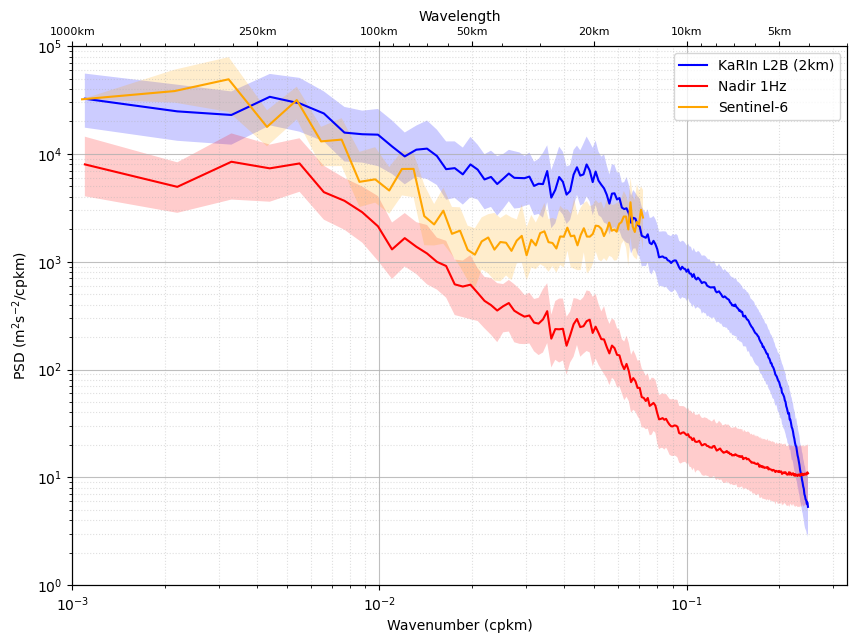

In [188]:
fig, ax = plt.subplots(figsize=(10,7))


# KaRIn L2B
key = "ssh_geoid_full"
c = list(karin2.keys())[0]
p = list(karin2[c].keys())[0]
ssh = []
for c in karin2.keys():
    for p in karin2[c].keys():
        for i in range(karin2[c][p][key]["lat"].shape[1]):
            vel = karin2[c][p][key]["ssc_u"][:,i]# + 1j*karin2[c][p][key]["ssc_v"][:,i]
            ssh.append(vel)
ssh.sort(key=len, reverse=True)
psd_karin2, k_karin2, sd = periodogram_list(ssh, conf_lvl=68, tapering_f="tukey", sampling=2000, unit="cm")
ax.loglog(k_karin2, psd_karin2, 'b')
ax.fill_between(k_karin2, sd[0,:], sd[1,:], color='b',edgecolor=None, alpha=.2,label="_nolegend_")


# KaRIn L2B
key = "ssh_geoid_full"
c = list(karin2.keys())[0]
p = list(karin2[c].keys())[0]
ssh = []
for c in karin2.keys():
    for p in karin2[c].keys():
        for i in range(karin2[c][p][key]["lat"].shape[1]):
            #vel = karin2[c][p][key]["ssc_u"][:,i] + 1j*karin2[c][p][key]["ssc_v"][:,i]
            vel = karin2[c][p][key]["ssh"][:,i]
            kern = np.hanning(2/2)
            kern /= kern.sum()
            vel = np.convolve(vel, kern, mode="same")
            ssh.append(vel)
ssh.sort(key=len, reverse=True)
psd_karin2, k_karin2, sd = periodogram_list(ssh, conf_lvl=68, tapering_f="tukey", sampling=2000, unit="m")
g = 9.82
Omega = 7.292*10**(-5) # From Steward 2008 p. 108 # s^-1
f = 2*Omega * np.sin(np.deg2rad(39))

psd_karin2_u = (g/f)**2*(2*np.pi*k_karin2)*psd_karin2
psd_karin2_u /= 1e4
sd_u  = (g/f)**2*(2*np.pi*k_karin2)*sd
sd_u /= 1e4

ax.loglog(k_karin2, psd_karin2_u, 'r')
ax.fill_between(k_karin2, sd_u[0,:], sd_u[1,:], color='r',edgecolor=None, alpha=.2,label="_nolegend_")



# KaRIn Nadir 1Hz
c = list(nadir1.keys())[0]
p = list(nadir1[c].keys())[0]
ssh = []
for c in nadir1.keys():
    for p in nadir1[c].keys():
        mask = np.logical_and(nadir1[c][p]["latitude"]>AOI[2],
                                nadir1[c][p]["latitude"]<AOI[3])
        ssh.append(nadir1[c][p]["ssh_geoid"][mask])
ssh.sort(key=len, reverse=True)
psd_nadir1, k_nadir1, sd = periodogram_list(ssh, conf_lvl=68, tapering_f="tukey", sampling=6832, unit="m")
g = 9.82
Omega = 7.292*10**(-5) # From Steward 2008 p. 108 # s^-1
f = 2*Omega * np.sin(np.deg2rad(39))

psd_nadir1_u = (g/f)**2*(2*np.pi*k_nadir1)*psd_nadir1
psd_nadir1_u /= 1e4
sd_u  = (g/f)**2*(2*np.pi*k_nadir1)*sd
sd_u /= 1e4

ax.loglog(k_nadir1, psd_nadir1_u, 'orange')
ax.fill_between(k_nadir1, sd_u[0,:], sd_u[1,:], color='orange',edgecolor=None, alpha=.2,label="_nolegend_")


"""
# Sentinel-6
ssh = []
for c in s6a.keys():
    x = s6a[c]["sea_level_anomaly"]
    if x.size < 1:
        continue
    ssh.append(s6a[c]["sea_level_anomaly"])
psd_s6, k_s6, sd = periodogram_list(ssh, conf_lvl=68, tapering_f="tukey", sampling=5757, unit="m")
g = 9.82
Omega = 7.292*10**(-5) # From Steward 2008 p. 108 # s^-1
f = 2*Omega * np.sin(np.deg2rad(39))

psd_s6_u = (g/f)**2*(2*np.pi*k_s6)*psd_s6
psd_s6_u /= 1e4
sd_u  = (g/f)**2*(2*np.pi*k_s6)*sd
sd_u /= 1e4
ax.loglog(k_s6, psd_s6_u, 'darkmagenta')
ax.fill_between(k_s6, sd_u[0,:], sd_u[1,:], color='darkmagenta',edgecolor=None, alpha=.2,label="_nolegend_")
"""

ax.legend(["KaRIn L2B (2km)", "Nadir 1Hz", "Sentinel-6"])

# Setup plot settings
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Wavenumber (cpkm)")
ax.set_ylabel("PSD (m$^2$s$^{-2}$/cpkm)")
ax.set_yticks(np.logspace(-6,6,13))
ax.set_ylim([1e0, 1e5])
ax.grid(which="major", alpha=0.8)
ax.grid(which="minor", alpha=0.4, linestyle=":")

# Create second axis
km_lims = [1000, 3]
ax.set_xlim([km_lims[0]**(-1), km_lims[1]**(-1)])
ax2 = ax.twiny()
ax2.set_xlabel("Wavelength")
ax2.set_xscale("log")
ax2.set_xlim(km_lims)
ticks = [1000, 250, 100, 50, 20, 10, 5]
ax2.set_xticks(ticks)
ax2.set_xticklabels([str(t)+"km" for t in ticks], fontsize=8)

plt.show()

In [10]:

EXTERNAL_DATA_PATH = "D:/MasterThesis/PT1H-m/cmems*"

all_files = glob.glob(EXTERNAL_DATA_PATH)

file = nc.Dataset(all_files[0], "r")

CMEMS = {}
for k in file.variables.keys():
    CMEMS[k] = np.ma.getdata(file.variables[k][:])

In [13]:
# Filter data
lon_mask = np.logical_and(CMEMS["longitude"]>AOI[0], CMEMS["longitude"]<AOI[1])
lat_mask = np.logical_and(CMEMS["latitude"]>AOI[2], CMEMS["latitude"]<AOI[3])

model_z = CMEMS["zos"][:,0,:,:]
#model_z = model_z[:,:,50:]#remove western edge
model_z[model_z>1e10] = np.nan


ssc_from_gradients = False
if ssc_from_gradients == False:

    model_v = CMEMS["vo"][:,0,:,:]
    #model_v = model_z[:,:,50:]#remove western edge
    model_v[model_v>1e10] = np.nan

    model_u = CMEMS["uo"][:,0,:,:]
    #model_u = model_u[:,:,50:]#remove western edge
    model_u[model_u>1e10] = np.nan

    model_ssc = np.sqrt( model_u**2 + model_v**2 ) # SSC m/s
elif ssc_from_gradients == True:
    # ssc from ssh
    _, model_sss_x, model_sss_y = np.gradient(model_z)
    model_sss_x /= 9.25
    model_sss_y /= 9.25

    # Surface Geostrophic current
    Omega = 7.292*10**(-5) # From Steward 2008 p. 108 # s^-1
    R = 6371*1e3
    g = 9.82 # m/s^2
    f = 2*Omega * np.sin(np.deg2rad(39))

    model_u = -g/(f) * (model_sss_y/1000) # convert gradient to m/m and multiply by factor
    model_v = g/(f) * (model_sss_x/1000) # convert gradient to m/m and multiply by factor
    model_ssc = np.sqrt( model_u**2 + model_v**2 ) # SSC m/s

model_lat, model_lon = np.meshgrid(CMEMS["latitude"], CMEMS["longitude"])

model_extent = [CMEMS["longitude"].min(), CMEMS["longitude"].max(),
                CMEMS["latitude"].min(), CMEMS["latitude"].max()]


In [194]:
fig, ax = plt.subplots(figsize=(10,7))

"""
# KaRIn L2B
key = "ssh_geoid_full"
c = list(karin2.keys())[0]
p = list(karin2[c].keys())[0]
ssh = []
for c in karin2.keys():
    for p in karin2[c].keys():
        for i in range(karin2[c][p][key]["lat"].shape[1]):
            vel = karin2[c][p][key]["ssc_u"][:,i] + 1j*karin2[c][p][key]["ssc_v"][:,i]
            #vel = karin2[c][p][key]["ssc_mag"][:,i]
            ssh.append(vel)
ssh.sort(key=len, reverse=True)
psd_karin2, k_karin2, sd = periodogram_list(ssh, conf_lvl=68, tapering_f="tukey", sampling=2000, unit="cm")
ax.loglog(k_karin2, psd_karin2, 'b')
ax.fill_between(k_karin2, sd[0,:], sd[1,:], color='b',edgecolor=None, alpha=.2,label="_nolegend_")
"""
"""
# KaRIn L2B
key = "ssh_geoid_long"
c = list(karin2.keys())[0]
p = list(karin2[c].keys())[0]
ssh = []
for c in karin2.keys():
    for p in karin2[c].keys():
        for i in range(karin2[c][p][key]["lat"].shape[1]):
            vel = karin2[c][p][key]["ssc_u"][:,i] + 1j*karin2[c][p][key]["ssc_v"][:,i]
            #vel = karin2[c][p][key]["ssc_mag"][:,i]
            ssh.append(vel)
ssh.sort(key=len, reverse=True)
psd_karin2, k_karin2, sd = periodogram_list(ssh, conf_lvl=68, tapering_f="tukey", sampling=2000, unit="cm")
psd_karin2 = psd_karin2[k_karin2<20**(-1)]
sd = sd[:,k_karin2<20**(-1)]
k_karin2 = k_karin2[k_karin2<20**(-1)]
ax.loglog(k_karin2, psd_karin2, 'r')
ax.fill_between(k_karin2, sd[0,:], sd[1,:], color='r',edgecolor=None, alpha=.2,label="_nolegend_")
"""

# KaRIn L2B
key = "ssh_geoid_full"
c = list(karin2.keys())[0]
p = list(karin2[c].keys())[0]
ssh = []
for c in karin2.keys():
    for p in karin2[c].keys():
        for i in range(karin2[c][p][key]["lat"].shape[1]):
            #vel = karin2[c][p][key]["ssc_u"][:,i] + 1j*karin2[c][p][key]["ssc_v"][:,i]
            vel = karin2[c][p][key]["ssh"][:,i]
            ssh.append(vel)
ssh.sort(key=len, reverse=True)
psd_karin2, k_karin2, sd = periodogram_list(ssh, conf_lvl=68, tapering_f="tukey", sampling=2000, unit="m")
g = 9.82
Omega = 7.292*10**(-5) # From Steward 2008 p. 108 # s^-1
f = 2*Omega * np.sin(np.deg2rad(39))

psd_karin2_u = (g/f)**2*(2*np.pi*k_karin2)*psd_karin2
psd_karin2_u /= 1e4
sd_u  = (g/f)**2*(2*np.pi*k_karin2)*sd
sd_u /= 1e4

ax.loglog(k_karin2, psd_karin2_u, 'r')
ax.fill_between(k_karin2, sd_u[0,:], sd_u[1,:], color='r',edgecolor=None, alpha=.2,label="_nolegend_")


# KaRIn Nadir 1Hz
c = list(nadir1.keys())[0]
p = list(nadir1[c].keys())[0]
ssh = []
for c in nadir1.keys():
    for p in nadir1[c].keys():
        mask = np.logical_and(nadir1[c][p]["latitude"]>36,
                                nadir1[c][p]["latitude"]<41)
        ssh.append(nadir1[c][p]["ssh_geoid"][mask])
ssh.sort(key=len, reverse=True)
psd_nadir1, k_nadir1, sd = periodogram_list(ssh, conf_lvl=68, tapering_f="tukey", sampling=6832, unit="m")
g = 9.82
Omega = 7.292*10**(-5) # From Steward 2008 p. 108 # s^-1
f = 2*Omega * np.sin(np.deg2rad(39))

psd_nadir1_u = (g/f)**2*(2*np.pi*k_nadir1)*psd_nadir1
psd_nadir1_u /= 1e4
sd_u  = (g/f)**2*(2*np.pi*k_nadir1)*sd
sd_u /= 1e4

ax.loglog(k_nadir1, psd_nadir1_u, 'orange')
ax.fill_between(k_nadir1, sd_u[0,:], sd_u[1,:], color='orange',edgecolor=None, alpha=.2,label="_nolegend_")


# Copernicus
ssh = []

for t in range(24):
    for i in range(model_u.shape[2]):
        vel = model_u[t,:,i] + 1j*model_v[t,:,i]
        ssh.append(vel)
ssh.sort(key=len, reverse=True)
psd_cmems, k_cmems, sd = periodogram_list(ssh, conf_lvl=68, tapering_f="tukey", sampling=9250, unit="cm")
ax.loglog(k_cmems, psd_cmems, 'green')
ax.fill_between(k_cmems, sd[0,:], sd[1,:], color='green',edgecolor=None, alpha=.2,label="_nolegend_")


"""
# Sentinel-6
ssh = []
for c in s6a.keys():
    x = s6a[c]["sea_level_anomaly"]
    if x.size < 1:
        continue
    ssh.append(s6a[c]["sea_level_anomaly"])
psd_s6, k_s6, sd = periodogram_list(ssh, conf_lvl=68, tapering_f="tukey", sampling=5757, unit="m")
g = 9.82
Omega = 7.292*10**(-5) # From Steward 2008 p. 108 # s^-1
f = 2*Omega * np.sin(np.deg2rad(39))

psd_s6_u = (g/f)**2*(2*np.pi*k_s6)*psd_s6
psd_s6_u /= 1e4
sd_u  = (g/f)**2*(2*np.pi*k_s6)*sd
sd_u /= 1e4
ax.loglog(k_s6, psd_s6_u, 'darkmagenta')
ax.fill_between(k_s6, sd_u[0,:], sd_u[1,:], color='darkmagenta',edgecolor=None, alpha=.2,label="_nolegend_")
"""


k_synth = np.arange(20.0, 250.0)**(-1)
for k in ["-1","-5/3", "-2", "-3", "-4"]:
    k_num = k.split("/")
    if len(k_num) > 1:
        k_num = float(k_num[0]) / float(k_num[1])
    else:
        k_num = float(k_num[0])
    fac = 1e5
    if k_num >= -2:
        fac = 2e6
    ax.plot(k_synth, (1e3*k_synth)**(k_num)*fac, "gray", alpha=0.5)
    ax.text(k_synth[k_synth.size//4], (1e3*k_synth[k_synth.size//4])**(k_num)*fac, r"$k^{{{}}}$".format(k))


ax.legend(["KaRIn L2B (2km)", "Nadir 1Hz", "CMEMS"])

# Setup plot settings
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Wavenumber (cpkm)")
ax.set_ylabel("PSD (m$^2$s$^{-2}$/cpkm)")
ax.set_yticks(np.logspace(-6,6,13))
ax.set_ylim([1e-1, 5e5])
ax.grid(which="major", alpha=0.8)
ax.grid(which="minor", alpha=0.4, linestyle=":")

# Create second axis
km_lims = [1000, 3]
ax.set_xlim([km_lims[0]**(-1), km_lims[1]**(-1)])
ax2 = ax.twiny()
ax2.set_xlabel("Wavelength")
ax2.set_xscale("log")
ax2.set_xlim(km_lims)
ticks = [1000, 250, 100, 50, 20, 10, 5]
ax2.set_xticks(ticks)
ax2.set_xticklabels([str(t)+"km" for t in ticks], fontsize=8)

plt.show()

## 21 Day Repeat Mapping

In [46]:
# Load Karin 2km data
#cycles = np.arange(474, 578+1).tolist()
passes_1_eastSea = [6,21]
passes_21_eastSea = [4, 19, 32, 47, 60, 75, 310, 325, 338, 353, 381]
#path = "D:/MasterThesis/PreBetaKaRIn_1day/expert/*"
path = "D:/MasterThesis/PreBetaKaRIn_21day/expert/*"
karin2 = loadKarinL2B(path, cycles=[4,5,6], passes=passes_21_eastSea, dist2coast=5)

Computing custom SSH variables


In [48]:
AOI = [125, 135, 35, 43]
karin2 = karin_l2b_filtering(karin2,AOI,20,2,detrend=True,type="design")

Plotting Enabled

Initializing variogram model...
Coordinates type: 'geographic' 

Using 'gaussian' Variogram Model
Partial Sill: 0.013
Full Sill: 0.015
Range: 0.5
Nugget: 0.002 



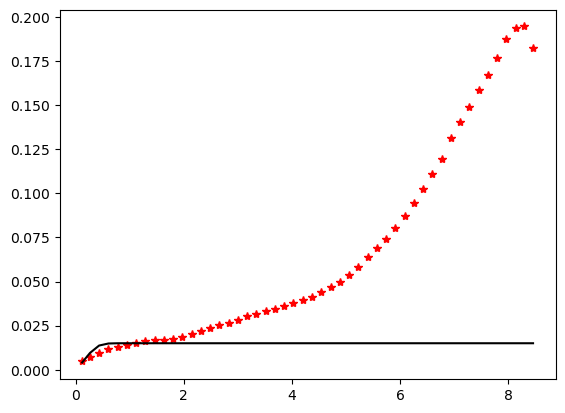

Calculating statistics on variogram model fit...


In [184]:
# Interpolate Gradients

# For kriging
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

# Interpolate Gradients

# ===========================================================
# SWOT
# Y axis
c = 5
decimate = 4
N = 100
lon_steps = np.linspace(AOI[0], AOI[1], int(N)) # Longitude
lat_steps = np.linspace(AOI[2], AOI[3], N) # Latitude
grid_locs = np.meshgrid(lon_steps, lat_steps)


points = np.array([[],[]]).T
values = np.array([])
for p in karin2[c].keys():
    points_ = np.c_[karin2[c][p]["ssh_geoid_long"]["lon"][::decimate,::decimate].reshape(-1), karin2[c][p]["ssh_geoid_long"]["lat"][::decimate,::decimate].reshape(-1)]
    values_ = karin2[c][p]["ssh_geoid_long"]["ssh"][::decimate,::decimate].reshape(-1)# + bias[idx]
    mask = np.logical_and(points_[:,0]>AOI[0],points_[:,0]<AOI[1])
    mask = np.logical_and(mask,points_[:,1]>AOI[2])
    mask = np.logical_and(mask,points_[:,1]<AOI[3])
    mask = np.logical_and(mask,~np.isnan(values_))
    points_ = points_[mask,:]
    values_ = values_[mask]

    points = np.r_[points, points_]
    values = np.r_[values, values_]

# Convert lon from -180:180 to 0:360
points[points[:,0]<0, 0] -= 360

interp = OrdinaryKriging(points[:,0],
                         points[:,1],
                         values,
                         variogram_model="gaussian",
                         variogram_parameters = {'sill': 0.015, 'range': 0.5, 'nugget': 0.002},
                         nlags=50,
                         verbose=True,
                         enable_plotting=True,
                         coordinates_type="geographic")


In [185]:

ssh_grid, ssh_grid_var = interp.execute("grid", lon_steps, lat_steps, backend="C", n_closest_points = 100)


Executing Ordinary Kriging...



In [85]:

def zero_dist(lst):
    # From https://stackoverflow.com/questions/75707773/finding-the-distance-to-the-nearest-0-in-a-list
    # User Samwise
    zeroes = [i for i, val in enumerate(lst) if val == 0]
    if zeroes != []:
        return [min(abs(i - z) for z in zeroes) for i in range(len(lst))]
    else:
        return np.zeros(lst.size).tolist()


# Due to strange topography remove edges
max_dist2nan = 10
for c in karin2.keys():
    for p in karin2[c].keys():
        key = "ssh_geoid_long"
        ssh = np.copy(karin2[c][p][key]["ssc_mag"])
        dist2nan = np.array([zero_dist((~np.isnan(ssh[:,s]))) for s in range(ssh.shape[1])]).T
        karin2[c][p][key]["ssc_mag"][dist2nan<max_dist2nan] = np.nan

Cycle 5


C:\Users\bjark\AppData\Local\Temp\ipykernel_8824\2190582447.py:41: RuntimeWarning: Mean of empty slice
  ssh_stack_mean = np.nanmean(ssh_stack,axis=0)
C:\Users\bjark\AppData\Local\Temp\ipykernel_8824\2190582447.py:41: RuntimeWarning: Mean of empty slice
  ssh_stack_mean = np.nanmean(ssh_stack,axis=0)
C:\Users\bjark\AppData\Local\Temp\ipykernel_8824\2190582447.py:41: RuntimeWarning: Mean of empty slice
  ssh_stack_mean = np.nanmean(ssh_stack,axis=0)
C:\Users\bjark\AppData\Local\Temp\ipykernel_8824\2190582447.py:41: RuntimeWarning: Mean of empty slice
  ssh_stack_mean = np.nanmean(ssh_stack,axis=0)
C:\Users\bjark\AppData\Local\Temp\ipykernel_8824\2190582447.py:41: RuntimeWarning: Mean of empty slice
  ssh_stack_mean = np.nanmean(ssh_stack,axis=0)
C:\Users\bjark\AppData\Local\Temp\ipykernel_8824\2190582447.py:41: RuntimeWarning: Mean of empty slice
  ssh_stack_mean = np.nanmean(ssh_stack,axis=0)
C:\Users\bjark\AppData\Local\Temp\ipykernel_8824\2190582447.py:41: RuntimeWarning: Mean of emp

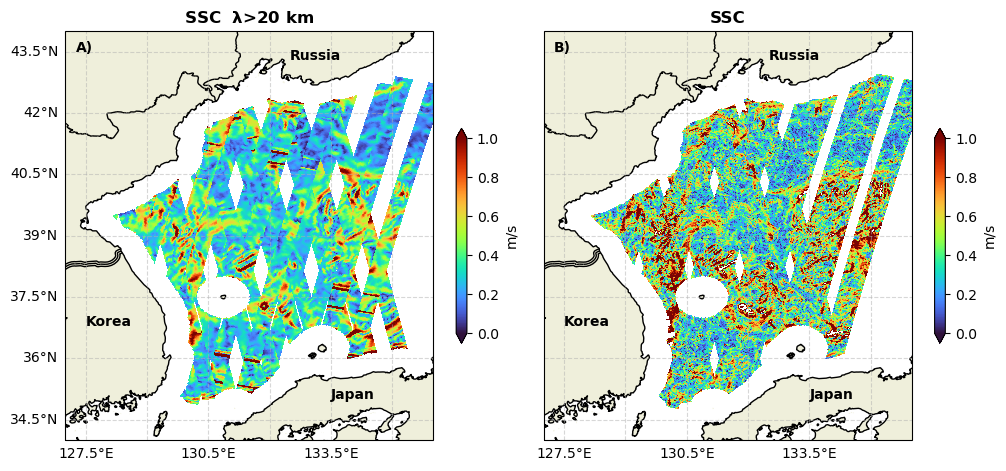

In [17]:
AOI = [128, 135, 35, 43]
#remove_margin = 15

#c = list(karin2.keys())[1]
c = 5
print("Cycle",c)

fig = plt.figure(figsize=(10,9))

ax = fig.add_subplot(2,2,1, projection=ccrs.PlateCarree())
detrend = False
gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False,alpha=0.5,linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.bottom_labels = True
ax.coastlines(resolution='10m')
ax.add_feature(cartopy.feature.LAND, zorder=1)
ax.add_feature(cartopy.feature.BORDERS)



# KaRIn
"""
for p in karin2[c].keys():
    key = "ssh_geoid_long"
    ssh = np.copy(karin2[c][p][key]["ssc_mag"])
    #ssh[ssh>2] = np.nan
    lat = karin2[c][p][key]["lat"]
    lon = karin2[c][p][key]["lon"]
    sc=ax.pcolormesh(lon, lat, ssh, cmap="turbo", vmin=0, vmax=1)
"""
for p in karin2[c].keys():
    key = "ssh_geoid_long"

    cycles_in_pass = []
    for c in karin2.keys():
        passes = list(karin2[c].keys())
        if p in passes:
            cycles_in_pass.append(c)
    ssh_stack = np.array([karin2[c_][p][key]["ssc_mag"] for c_ in cycles_in_pass])
    ssh_stack_mean = np.nanmean(ssh_stack,axis=0)
    lat = karin2[c][p][key]["lat"]
    lon = karin2[c][p][key]["lon"]
    sc=ax.pcolormesh(lon, lat, ssh_stack_mean, cmap="turbo", vmin=0, vmax=1)

fig.colorbar(sc, label=r"m/s", orientation="vertical", shrink=0.5, pad=0.05, extend="both")

ax.text(AOI[0]-0.75, AOI[3]+0.5, "A)", fontweight="bold")

ax.text(133.5, 35, "Japan", fontweight="bold")
#ax.annotate("Japan", (133.5, 35), (133.5, 35), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
ax.text(127.5, 36.8, "Korea", fontweight="bold")
#ax.annotate("Korea", (127.5, 36.8), (127.5, 36.8), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
ax.text(132.5, 43.3, "Russia", fontweight="bold")
#ax.annotate("Russia", (132.5, 43.3), (132.5, 43.3), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
#ax.set_title("Data Extent", fontweight="bold")
ax.set_extent(np.array(AOI)+np.array([-1,1,-1,1])*1, crs=ccrs.PlateCarree())
ax.set_title("SSC  $\mathbf{\lambda}}$>20 km", fontweight="bold")


ax = fig.add_subplot(2,2,2, projection=ccrs.PlateCarree())
detrend = False
ax.coastlines(resolution='10m')
ax.add_feature(cartopy.feature.LAND, zorder=1)
gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False,alpha=0.5,linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.left_labels = False
gl.bottom_labels = True
ax.add_feature(cartopy.feature.BORDERS)



# KaRIn
for p in karin2[c].keys():
    key = "ssh_geoid_full"
    ssh = np.copy(karin2[c][p][key]["ssc_mag"])
    ssh[ssh>np.nanstd(ssh)*5] = np.nan
    lat = karin2[c][p][key]["lat"]
    lon = karin2[c][p][key]["lon"]
    sc=ax.pcolormesh(lon, lat, ssh, cmap="turbo", vmin=0, vmax=1)
fig.colorbar(sc, label=r"m/s", orientation="vertical", shrink=0.5, pad=0.05, extend="both")

ax.text(AOI[0]-0.75, AOI[3]+0.5, "B)", fontweight="bold")

ax.text(133.5, 35, "Japan", fontweight="bold")
#ax.annotate("Japan", (133.5, 35), (133.5, 35), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
ax.text(127.5, 36.8, "Korea", fontweight="bold")
#ax.annotate("Korea", (127.5, 36.8), (127.5, 36.8), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
ax.text(132.5, 43.3, "Russia", fontweight="bold")
#ax.annotate("Russia", (132.5, 43.3), (132.5, 43.3), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
#ax.set_title("Data Extent", fontweight="bold")
ax.set_extent(np.array(AOI)+np.array([-1,1,-1,1])*1, crs=ccrs.PlateCarree())
ax.set_title("SSC  $\mathbf{\lambda}}$>2 km", fontweight="bold")


plt.tight_layout(pad=0.0)
plt.show()


Cycle 5


C:\Users\bjark\AppData\Local\Temp\ipykernel_8824\1086515233.py:41: RuntimeWarning: Mean of empty slice
  ssh_stack_mean = np.nanmean(ssh_stack,axis=0)
C:\Users\bjark\AppData\Local\Temp\ipykernel_8824\1086515233.py:41: RuntimeWarning: Mean of empty slice
  ssh_stack_mean = np.nanmean(ssh_stack,axis=0)
C:\Users\bjark\AppData\Local\Temp\ipykernel_8824\1086515233.py:41: RuntimeWarning: Mean of empty slice
  ssh_stack_mean = np.nanmean(ssh_stack,axis=0)
C:\Users\bjark\AppData\Local\Temp\ipykernel_8824\1086515233.py:41: RuntimeWarning: Mean of empty slice
  ssh_stack_mean = np.nanmean(ssh_stack,axis=0)
C:\Users\bjark\AppData\Local\Temp\ipykernel_8824\1086515233.py:41: RuntimeWarning: Mean of empty slice
  ssh_stack_mean = np.nanmean(ssh_stack,axis=0)
C:\Users\bjark\AppData\Local\Temp\ipykernel_8824\1086515233.py:41: RuntimeWarning: Mean of empty slice
  ssh_stack_mean = np.nanmean(ssh_stack,axis=0)
C:\Users\bjark\AppData\Local\Temp\ipykernel_8824\1086515233.py:41: RuntimeWarning: Mean of emp

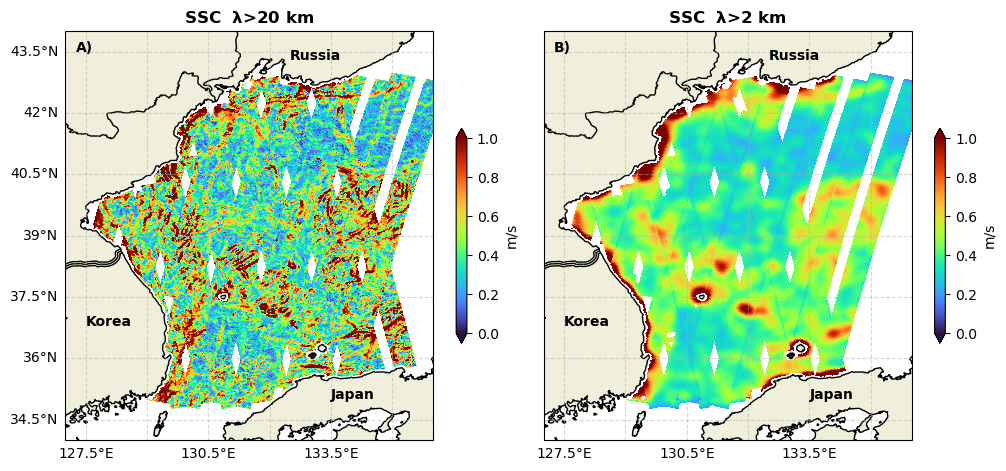

In [76]:
AOI = [128, 135, 35, 43]
#remove_margin = 15

#c = list(karin2.keys())[1]
c = 5
print("Cycle",c)

fig = plt.figure(figsize=(10,9))

ax = fig.add_subplot(2,2,1, projection=ccrs.PlateCarree())
detrend = False
gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False,alpha=0.5,linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.bottom_labels = True
ax.coastlines(resolution='10m')
ax.add_feature(cartopy.feature.LAND, zorder=1)
ax.add_feature(cartopy.feature.BORDERS)



# KaRIn
"""
for p in karin2[c].keys():
    key = "ssh_geoid_long"
    ssh = np.copy(karin2[c][p][key]["ssc_mag"])
    #ssh[ssh>2] = np.nan
    lat = karin2[c][p][key]["lat"]
    lon = karin2[c][p][key]["lon"]
    sc=ax.pcolormesh(lon, lat, ssh, cmap="turbo", vmin=0, vmax=1)
"""
for p in karin2[c].keys():
    key = "ssh_geoid_full"

    cycles_in_pass = []
    for c in karin2.keys():
        passes = list(karin2[c].keys())
        if p in passes:
            cycles_in_pass.append(c)
    ssh_stack = np.array([karin2[c_][p][key]["ssc_mag"] for c_ in cycles_in_pass])
    ssh_stack_mean = np.nanmean(ssh_stack,axis=0)
    lat = karin2[c][p][key]["lat"]
    lon = karin2[c][p][key]["lon"]
    sc=ax.pcolormesh(lon, lat, ssh_stack_mean, cmap="turbo", vmin=0, vmax=1)

fig.colorbar(sc, label=r"m/s", orientation="vertical", shrink=0.5, pad=0.05, extend="both")

ax.text(AOI[0]-0.75, AOI[3]+0.5, "A)", fontweight="bold")

ax.text(133.5, 35, "Japan", fontweight="bold")
#ax.annotate("Japan", (133.5, 35), (133.5, 35), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
ax.text(127.5, 36.8, "Korea", fontweight="bold")
#ax.annotate("Korea", (127.5, 36.8), (127.5, 36.8), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
ax.text(132.5, 43.3, "Russia", fontweight="bold")
#ax.annotate("Russia", (132.5, 43.3), (132.5, 43.3), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
#ax.set_title("Data Extent", fontweight="bold")
ax.set_extent(np.array(AOI)+np.array([-1,1,-1,1])*1, crs=ccrs.PlateCarree())
ax.set_title("SSC  $\mathbf{\lambda}}$>20 km", fontweight="bold")


ax = fig.add_subplot(2,2,2, projection=ccrs.PlateCarree())
detrend = False
ax.coastlines(resolution='10m')
ax.add_feature(cartopy.feature.LAND, zorder=1)
gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False,alpha=0.5,linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.left_labels = False
gl.bottom_labels = True
ax.add_feature(cartopy.feature.BORDERS, zorder=2)



# KaRIn
for p in karin2[c].keys():
    key = "ssh_geoid_full"
    mask = np.logical_and(karin2[c][p]["latitude"][:,0]>AOI[2], karin2[c][p]["latitude"][:,0]<AOI[3])
    #ssh = np.copy(karin2[c][p][key]["egm_sss_y"])
    G = np.copy(karin2[c][p]["geoid"][mask])
    eta = np.copy(karin2[c][p]["mean_sea_surface_dtu"][mask]) - G
    
    eta_sss_x, eta_sss_y = np.gradient(eta)
    eta_sss_x /= 2
    eta_sss_y /= 2

    # Surface Geostrophic current
    Omega = 7.292*10**(-5) # From Steward 2008 p. 108 # s^-1
    R = 6371*1e3
    g = 9.82 # m/s^2
    f = 2*Omega * np.sin(np.deg2rad(39))

    eta_u = -g/(f) * (eta_sss_y/1000) # convert gradient to m/m and multiply by factor
    eta_v = g/(f) * (eta_sss_x/1000) # convert gradient to m/m and multiply by factor
    eta_ssc = np.sqrt( eta_u**2 + eta_v**2 ) # SSC m/s
    kern = np.outer(np.hanning(50//2), np.hanning(50//2))
    kern /= kern.sum()
    eta_ssc = scipy.signal.fftconvolve(eta_ssc, kern, mode="same")
    eta_ssc[np.isnan(karin2[c][p][key]["ssc_u"])] = np.nan
    lat = karin2[c][p][key]["lat"]
    lon = karin2[c][p][key]["lon"]
    sc=ax.pcolormesh(lon, lat, eta_ssc, cmap="turbo", vmin=0, vmax=1)
fig.colorbar(sc, label=r"m/s", orientation="vertical", shrink=0.5, pad=0.05, extend="both")

ax.text(AOI[0]-0.75, AOI[3]+0.5, "B)", fontweight="bold")

ax.text(133.5, 35, "Japan", fontweight="bold")
#ax.annotate("Japan", (133.5, 35), (133.5, 35), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
ax.text(127.5, 36.8, "Korea", fontweight="bold")
#ax.annotate("Korea", (127.5, 36.8), (127.5, 36.8), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
ax.text(132.5, 43.3, "Russia", fontweight="bold")
#ax.annotate("Russia", (132.5, 43.3), (132.5, 43.3), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
#ax.set_title("Data Extent", fontweight="bold")
ax.set_extent(np.array(AOI)+np.array([-1,1,-1,1])*1, crs=ccrs.PlateCarree())
ax.set_title("SSC  $\mathbf{\lambda}}$>2 km", fontweight="bold")


plt.tight_layout(pad=0.0)
plt.show()


In [5]:

EXTERNAL_DATA_PATH = "D:/MasterThesis/PT1H-m/cmems*"

all_files = glob.glob(EXTERNAL_DATA_PATH)

file = nc.Dataset(all_files[0], "r")

CMEMS = {}
for k in file.variables.keys():
    CMEMS[k] = np.ma.getdata(file.variables[k][:])

In [6]:
# Filter data
lon_mask = np.logical_and(CMEMS["longitude"]>AOI[0], CMEMS["longitude"]<AOI[1])
lat_mask = np.logical_and(CMEMS["latitude"]>AOI[2], CMEMS["latitude"]<AOI[3])

model_v = CMEMS["vo"][:,0,:,:]
model_v[model_v>1e10] = np.nan

model_u = CMEMS["uo"][:,0,:,:]
model_u[model_u>1e10] = np.nan

model_ssc = np.sqrt( model_u**2 + model_v**2 ) # SSC m/s

model_lat, model_lon = np.meshgrid(CMEMS["latitude"], CMEMS["longitude"])

model_extent = [CMEMS["longitude"].min(), CMEMS["longitude"].max(),
                CMEMS["latitude"].min(), CMEMS["latitude"].max()]

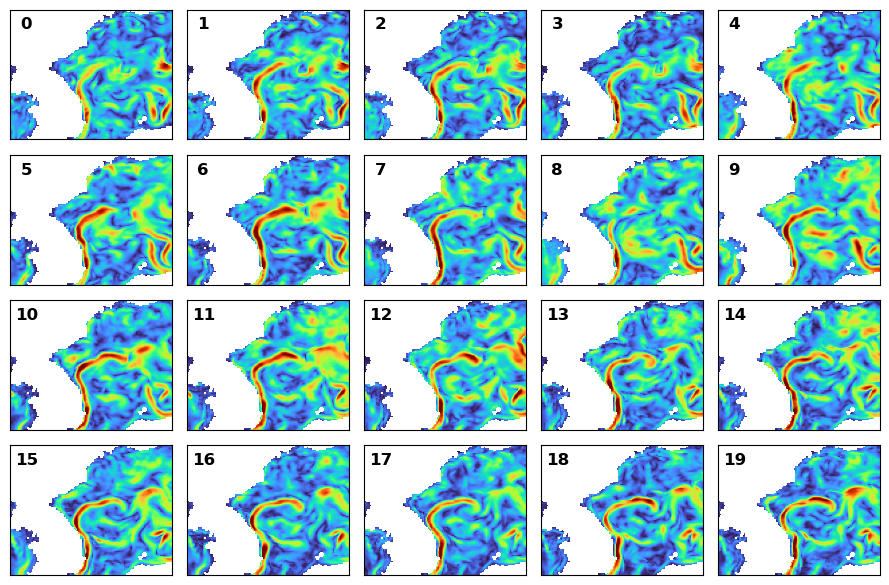

In [7]:
fig = plt.figure(figsize=(9,6))

for i in range(4*5):
    ax = fig.add_subplot(4,5,i+1)
    ax.imshow(model_ssc[i*24],origin="lower",extent=model_extent, cmap="turbo", vmin=0, vmax=0.8)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(i,y=1.0,x=0.1,pad=-14, fontweight="bold")
plt.tight_layout()
plt.show()

Cycle 5


C:\Users\bjark\AppData\Local\Temp\ipykernel_16056\631565157.py:63: RuntimeWarning: Mean of empty slice
  ssh_stack_mean = np.nanmean(ssh_stack,axis=0)
C:\Users\bjark\AppData\Local\Temp\ipykernel_16056\631565157.py:63: RuntimeWarning: Mean of empty slice
  ssh_stack_mean = np.nanmean(ssh_stack,axis=0)
C:\Users\bjark\AppData\Local\Temp\ipykernel_16056\631565157.py:63: RuntimeWarning: Mean of empty slice
  ssh_stack_mean = np.nanmean(ssh_stack,axis=0)
C:\Users\bjark\AppData\Local\Temp\ipykernel_16056\631565157.py:63: RuntimeWarning: Mean of empty slice
  ssh_stack_mean = np.nanmean(ssh_stack,axis=0)
C:\Users\bjark\AppData\Local\Temp\ipykernel_16056\631565157.py:63: RuntimeWarning: Mean of empty slice
  ssh_stack_mean = np.nanmean(ssh_stack,axis=0)
C:\Users\bjark\AppData\Local\Temp\ipykernel_16056\631565157.py:63: RuntimeWarning: Mean of empty slice
  ssh_stack_mean = np.nanmean(ssh_stack,axis=0)
C:\Users\bjark\AppData\Local\Temp\ipykernel_16056\631565157.py:63: RuntimeWarning: Mean of emp

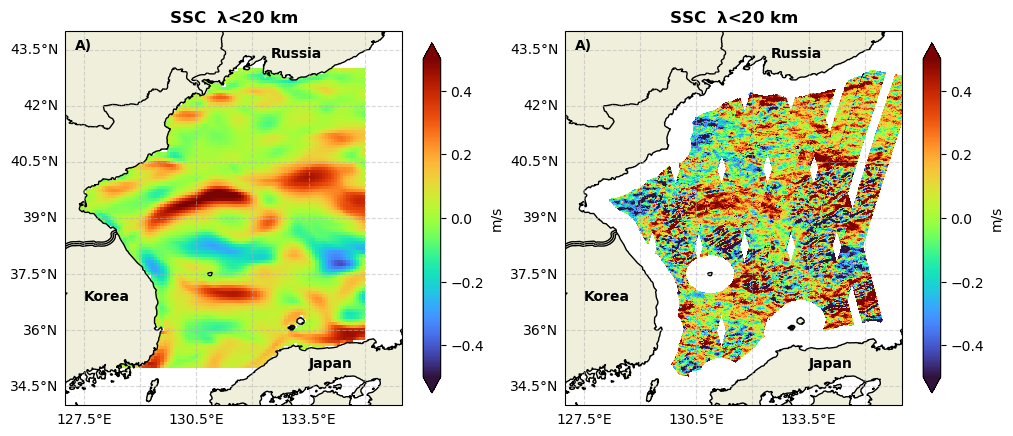

In [8]:
AOI = [128, 135, 35, 43]

#c = list(karin2.keys())[1]
c = 5
print("Cycle",c)

fig = plt.figure(figsize=(10,7))

ax = fig.add_subplot(1,2,1, projection=ccrs.PlateCarree())
detrend = False
gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False,alpha=0.5,linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.bottom_labels = True
ax.coastlines(resolution='10m')
ax.add_feature(cartopy.feature.LAND, zorder=1)
ax.add_feature(cartopy.feature.BORDERS)

sc=ax.imshow(model_u.mean(axis=0),origin="lower",extent=model_extent, cmap="turbo", vmin=-0.5, vmax=0.5)
fig.colorbar(sc, label=r"m/s", orientation="vertical", shrink=0.5, pad=0.05, extend="both")

ax.text(AOI[0]-0.75, AOI[3]+0.5, "A)", fontweight="bold")

ax.text(133.5, 35, "Japan", fontweight="bold")
#ax.annotate("Japan", (133.5, 35), (133.5, 35), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
ax.text(127.5, 36.8, "Korea", fontweight="bold")
#ax.annotate("Korea", (127.5, 36.8), (127.5, 36.8), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
ax.text(132.5, 43.3, "Russia", fontweight="bold")
#ax.annotate("Russia", (132.5, 43.3), (132.5, 43.3), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
#ax.set_title("Data Extent", fontweight="bold")
ax.set_extent(np.array(AOI)+np.array([-1,1,-1,1])*1, crs=ccrs.PlateCarree())
ax.set_title("SSC  $\mathbf{\lambda}}$<20 km", fontweight="bold")


ax = fig.add_subplot(1,2,2, projection=ccrs.PlateCarree())
detrend = False
gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False,alpha=0.5,linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.bottom_labels = True
ax.coastlines(resolution='10m')
ax.add_feature(cartopy.feature.LAND, zorder=1)
ax.add_feature(cartopy.feature.BORDERS)

# KaRIn
"""
for p in karin2[c].keys():
    key = "ssh_geoid_long"
    ssh = np.copy(karin2[c][p][key]["ssc_mag"])
    lat = karin2[c][p][key]["lat"]
    lon = karin2[c][p][key]["lon"]
    sc=ax.pcolormesh(lon, lat, ssh, cmap="turbo", vmin=0, vmax=1)
"""
for p in karin2[c].keys():
    key = "ssh_geoid_full"

    cycles_in_pass = []
    for c in karin2.keys():
        passes = list(karin2[c].keys())
        if p in passes:
            cycles_in_pass.append(c)
    ssh_stack = np.array([karin2[c_][p][key]["ssc_u"] for c_ in cycles_in_pass])
    ssh_stack_mean = np.nanmean(ssh_stack,axis=0)
    lat = karin2[c][p][key]["lat"]
    lon = karin2[c][p][key]["lon"]
    sc=ax.pcolormesh(lon, lat, ssh_stack_mean, cmap="turbo", vmin=-0.5, vmax=0.5)
fig.colorbar(sc, label=r"m/s", orientation="vertical", shrink=0.5, pad=0.05, extend="both")

ax.text(AOI[0]-0.75, AOI[3]+0.5, "A)", fontweight="bold")

ax.text(133.5, 35, "Japan", fontweight="bold")
#ax.annotate("Japan", (133.5, 35), (133.5, 35), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
ax.text(127.5, 36.8, "Korea", fontweight="bold")
#ax.annotate("Korea", (127.5, 36.8), (127.5, 36.8), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
ax.text(132.5, 43.3, "Russia", fontweight="bold")
#ax.annotate("Russia", (132.5, 43.3), (132.5, 43.3), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
#ax.set_title("Data Extent", fontweight="bold")
ax.set_extent(np.array(AOI)+np.array([-1,1,-1,1])*1, crs=ccrs.PlateCarree())
ax.set_title("SSC  $\mathbf{\lambda}}$<20 km", fontweight="bold")


plt.tight_layout(pad=0.0)
plt.show()


C:\Users\bjark\AppData\Local\Temp\ipykernel_16056\552066853.py:38: RuntimeWarning: Mean of empty slice
  ssh_stack_mean = np.nanmean(ssh_stack,axis=0)


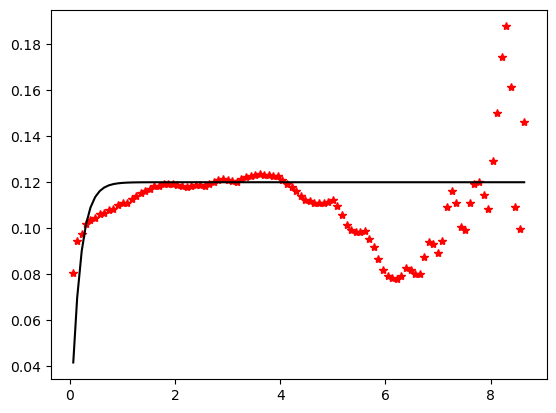

In [10]:
# Interpolate Gradients

# For kriging
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

# Interpolate Gradients
remove_margin = 10

# ===========================================================
# SWOT
# Y axis
c = 5
decimate = 4
N = 100
lon_steps = np.linspace(AOI[0], AOI[1], int(N)) # Longitude
lat_steps = np.linspace(AOI[2], AOI[3], N) # Latitude
grid_locs = np.meshgrid(lon_steps, lat_steps)

points = np.array([[],[]]).T
values = np.array([])
for p in karin2[c].keys():
    points_ = np.c_[karin2[c][p]["ssh_geoid_long"]["lon"][::decimate,::decimate].reshape(-1), 
                    karin2[c][p]["ssh_geoid_long"]["lat"][::decimate,::decimate].reshape(-1)]
    #ssh = np.copy(karin2[c][p]["ssh_geoid_long"]["ssc_mag"])
    #ssh[:,:remove_margin] = np.nan
    #ssh[:,-remove_margin:] = np.nan
    #ssh = ssh[::decimate,::decimate].reshape(-1)
    
    # Stack SSH
    key = "ssh_geoid_full"
    cycles_in_pass = []
    for c in karin2.keys():
        passes = list(karin2[c].keys())
        if p in passes:
            cycles_in_pass.append(c)
    ssh_stack = np.array([karin2[c_][p][key]["ssc_u"] for c_ in cycles_in_pass])
    ssh_stack_mean = np.nanmean(ssh_stack,axis=0)
    ssh = ssh_stack_mean[::decimate,::decimate].reshape(-1)

    values_ = ssh
    mask = np.logical_and(points_[:,0]>AOI[0],points_[:,0]<AOI[1])
    mask = np.logical_and(mask,points_[:,1]>AOI[2])
    mask = np.logical_and(mask,points_[:,1]<AOI[3])
    mask = np.logical_and(mask,~np.isnan(values_))
    points_ = points_[mask,:]
    values_ = values_[mask]

    points = np.r_[points, points_]
    values = np.r_[values, values_]

# Convert lon from -180:180 to 0:360
points[points[:,0]<0, 0] -= 360

interp = OrdinaryKriging(points[:,0],
                         points[:,1],
                         values,
                         variogram_model="exponential",
                         variogram_parameters = {'sill': 0.12, 'range': 0.5, 'nugget': 0.005},
                         nlags=100,
                         verbose=False,
                         enable_plotting=True,
                         coordinates_type="geographic")


In [11]:

ssc_grid, ssc_grid_var = interp.execute("points", model_lon.reshape(-1), model_lat.reshape(-1), backend="C", n_closest_points = 100)
ssc_grid = ssc_grid.reshape(model_lon.shape).T
ssc_grid_var = ssc_grid_var.reshape(model_lon.shape).T
grid_extent = model_extent
print("SSC done")


SSC done


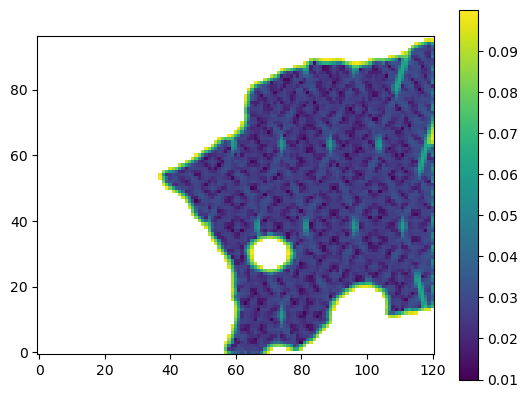

In [12]:
x = np.copy(ssc_grid_var)
sd_lim = 0.1
x[x>sd_lim] = np.nan
plt.imshow(x, origin="lower")
plt.colorbar()

Cycle 5


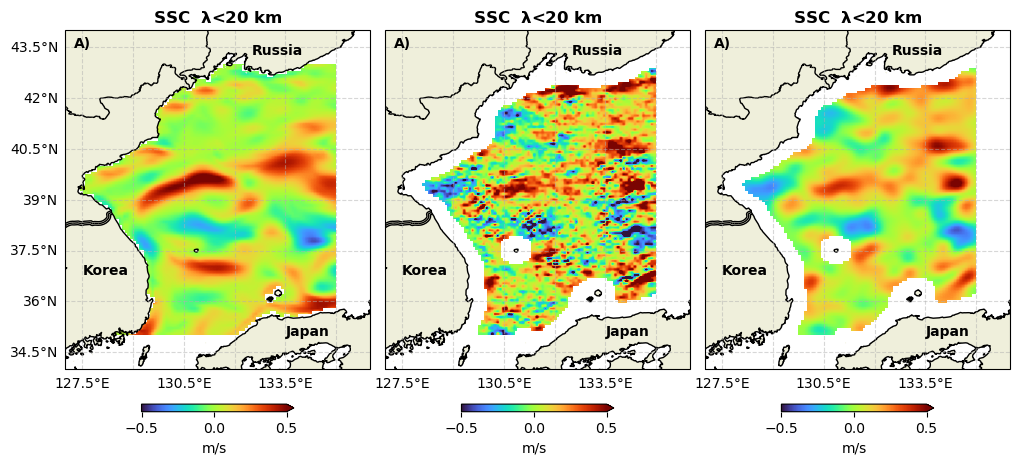

In [32]:
AOI = [128, 135, 35, 43]

#c = list(karin2.keys())[1]
c = 5
print("Cycle",c)

fig = plt.figure(figsize=(10,7))

ax = fig.add_subplot(1,3,1, projection=ccrs.PlateCarree())
detrend = False
gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False,alpha=0.5,linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.bottom_labels = True
ax.coastlines(resolution='10m')
ax.add_feature(cartopy.feature.LAND, zorder=1)
ax.add_feature(cartopy.feature.BORDERS)

sc=ax.imshow(model_u.mean(axis=0),origin="lower",extent=model_extent, cmap="turbo", vmin=-0.5, vmax=0.5)
fig.colorbar(sc, label=r"m/s", orientation="horizontal", shrink=0.5, pad=0.05, extend="max")

ax.text(AOI[0]-0.75, AOI[3]+0.5, "A)", fontweight="bold")

ax.text(133.5, 35, "Japan", fontweight="bold")
#ax.annotate("Japan", (133.5, 35), (133.5, 35), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
ax.text(127.5, 36.8, "Korea", fontweight="bold")
#ax.annotate("Korea", (127.5, 36.8), (127.5, 36.8), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
ax.text(132.5, 43.3, "Russia", fontweight="bold")
#ax.annotate("Russia", (132.5, 43.3), (132.5, 43.3), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
#ax.set_title("Data Extent", fontweight="bold")
ax.set_extent(np.array(AOI)+np.array([-1,1,-1,1])*1, crs=ccrs.PlateCarree())
ax.set_title("SSC  $\mathbf{\lambda}}$<20 km", fontweight="bold")


ax = fig.add_subplot(1,3,2, projection=ccrs.PlateCarree())
detrend = False
gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False,alpha=0.5,linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.bottom_labels = True
gl.left_labels = False
ax.coastlines(resolution='10m')
ax.add_feature(cartopy.feature.LAND, zorder=1)
ax.add_feature(cartopy.feature.BORDERS)

var = np.copy(ssc_grid_var)
x = np.copy(ssc_grid)
x[var>sd_lim] = np.nan
sc=ax.imshow(x,origin="lower",extent=model_extent, cmap="turbo", vmin=-0.5, vmax=0.5)
fig.colorbar(sc, label=r"m/s", orientation="horizontal", shrink=0.5, pad=0.05, extend="max")

ax.text(AOI[0]-0.75, AOI[3]+0.5, "A)", fontweight="bold")

ax.text(133.5, 35, "Japan", fontweight="bold")
#ax.annotate("Japan", (133.5, 35), (133.5, 35), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
ax.text(127.5, 36.8, "Korea", fontweight="bold")
#ax.annotate("Korea", (127.5, 36.8), (127.5, 36.8), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
ax.text(132.5, 43.3, "Russia", fontweight="bold")
#ax.annotate("Russia", (132.5, 43.3), (132.5, 43.3), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
#ax.set_title("Data Extent", fontweight="bold")
ax.set_extent(np.array(AOI)+np.array([-1,1,-1,1])*1, crs=ccrs.PlateCarree())
ax.set_title("SSC  $\mathbf{\lambda}}$<20 km", fontweight="bold")



ax = fig.add_subplot(1,3,3, projection=ccrs.PlateCarree())
detrend = False
gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False,alpha=0.5,linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.bottom_labels = True
gl.left_labels = False
ax.coastlines(resolution='10m')
ax.add_feature(cartopy.feature.LAND, zorder=1)
ax.add_feature(cartopy.feature.BORDERS)

kern = np.outer(np.hanning(100//10), np.hanning(100//10))
kern /= kern.sum()
nanmask = np.isnan(ssc_grid)
ssc_grid[nanmask] = 0
ssc_grid_filt = scipy.signal.fftconvolve(ssc_grid, kern, mode="same")
var = np.copy(ssc_grid_var)
x = ssc_grid_filt
x[nanmask] = np.nan
x[var>sd_lim] = np.nan
sc=ax.imshow(x,origin="lower",extent=model_extent, cmap="turbo", vmin=-0.5, vmax=0.5)
fig.colorbar(sc, label=r"m/s", orientation="horizontal", shrink=0.5, pad=0.05, extend="max")

ax.text(AOI[0]-0.75, AOI[3]+0.5, "A)", fontweight="bold")

ax.text(133.5, 35, "Japan", fontweight="bold")
#ax.annotate("Japan", (133.5, 35), (133.5, 35), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
ax.text(127.5, 36.8, "Korea", fontweight="bold")
#ax.annotate("Korea", (127.5, 36.8), (127.5, 36.8), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
ax.text(132.5, 43.3, "Russia", fontweight="bold")
#ax.annotate("Russia", (132.5, 43.3), (132.5, 43.3), fontweight="bold", bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
#ax.set_title("Data Extent", fontweight="bold")
ax.set_extent(np.array(AOI)+np.array([-1,1,-1,1])*1, crs=ccrs.PlateCarree())
ax.set_title("SSC  $\mathbf{\lambda}}$<20 km", fontweight="bold")


plt.tight_layout(pad=0.0)
plt.show()


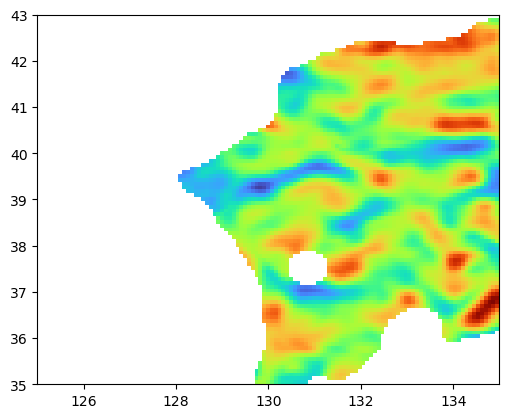

In [33]:
plt.imshow(x-model_u.mean(axis=0),origin="lower",extent=model_extent, cmap="turbo", vmin=-0.5, vmax=0.5)

In [34]:
a = x.reshape(-1)
b = model_u.mean(axis=0).reshape(-1)
nanmask = np.logical_and((~np.isnan(a)), (~np.isnan(b)))
np.corrcoef(a[nanmask], b[nanmask])[1,0]

0.46543687667793654